In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
ds=pd.read_csv("pima-indians-diabetes.data.csv")
ds

,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
ds.isnull().any()#there are no nan values but there are 0

preg     False
 plas    False
pres     False
Skin     False
test     False
mass     False
pedi     False
age      False
class    False
dtype: bool

In [4]:
ds[' plas'] = ds[' plas'].replace([0],[np.nan])
ds['pres'] = ds['pres'].replace([0],[np.nan])
ds['Skin '] = ds['Skin '].replace([0],[np.nan])
ds['mass'] = ds['mass'].replace([0],[np.nan])
ds['test'] = ds['test'].replace([0],[np.nan])

In [5]:
ds.isnull().sum()

preg       0
 plas      5
pres      35
Skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [6]:
diabetes_true_count = len(ds.loc[ds['class'] == True])
diabetes_false_count = len(ds.loc[ds['class'] == False])
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [7]:
ds[' plas'].fillna(ds[' plas'].median(),inplace=True)
ds['pres'].fillna(ds['pres'].median(),inplace=True)
ds['Skin '].fillna(ds['Skin '].median(),inplace=True)
ds['mass'].fillna(ds['mass'].median(),inplace=True)
ds['test'].fillna(ds['test'].median(),inplace=True)

In [8]:
ds.isnull().sum()

preg     0
 plas    0
pres     0
Skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

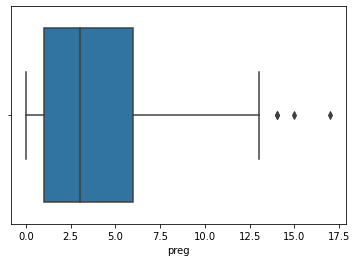

In [9]:
import seaborn as sns
sns.boxplot(x=ds['preg'])

In [10]:
ds['preg'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: preg, dtype: int64

In [11]:
def median_target(var):   
    temp = ds[ds[var].notnull()]
    temp = temp[[var, 'class']].groupby(['class'])[[var]].median().reset_index()
    return temp

In [12]:
ds['preg'].median()

3.0

In [13]:
median_target('preg')

,class,preg
0,0,2
1,1,4


In [14]:
ds.loc[(ds['class'] == 0 ) & (ds['preg']>13), 'preg'] = 2
ds.loc[(ds['class'] == 1 ) & (ds['preg']>13), 'preg'] = 4

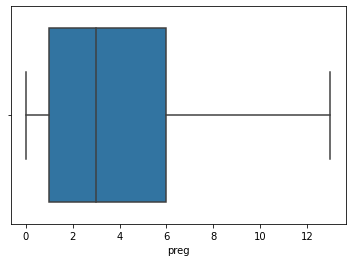

In [15]:
sns.boxplot(x=ds['preg'])

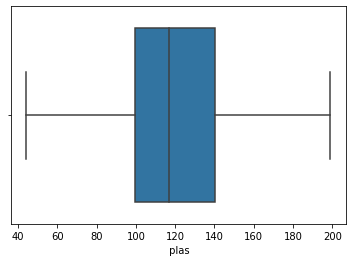

In [16]:
sns.boxplot(x=ds[' plas'])

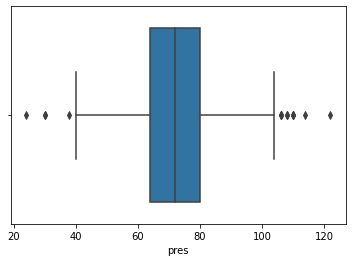

In [17]:
sns.boxplot(x=ds['pres'])

In [18]:
ds['pres'].median()

72.0

In [19]:
median_target('pres')

,class,pres
0,0,72.0
1,1,74.0


In [20]:
ds.loc[(ds['class'] == 0 ) & (ds['pres']<40), 'pres'] = 72.0
ds.loc[(ds['class'] == 1 ) & (ds['pres']<40), 'pres'] = 74.5

In [21]:
ds.loc[(ds['class'] == 0 ) & (ds['pres']>103), 'pres'] = 72.0
ds.loc[(ds['class'] == 1 ) & (ds['pres']>103), 'pres'] = 74.5

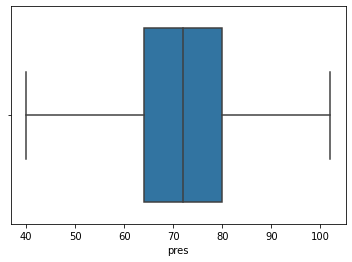

In [22]:
sns.boxplot(x=ds['pres'])

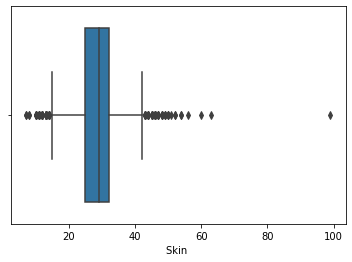

In [23]:
sns.boxplot(x=ds['Skin '])

In [24]:
median_target('Skin ')

,class,Skin
0,0,29.0
1,1,29.0


In [25]:
ds.loc[(ds['class'] == 0 ) & (ds['Skin ']>38), 'Skin '] = 26.0
ds.loc[(ds['class'] == 1 ) & (ds['Skin ']>38), 'Skin '] = 33.0

In [26]:
ds.loc[(ds['class'] == 0 ) & (ds['Skin ']<20), 'Skin '] = 26.0
ds.loc[(ds['class'] == 1 ) & (ds['Skin ']<20), 'Skin '] = 33.0

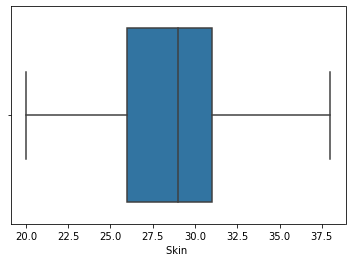

In [27]:
sns.boxplot(x=ds['Skin '])

In [28]:
median_target('mass')

,class,mass
0,0,30.40
1,1,34.25


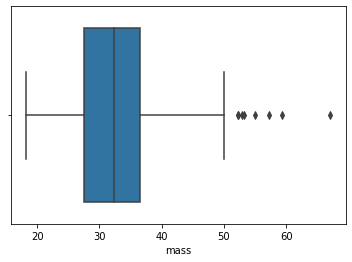

In [29]:
sns.boxplot(x=ds['mass'])

In [30]:
ds.loc[(ds['class'] == 0 ) & (ds['mass']>48), 'mass'] = 30.40
ds.loc[(ds['class'] == 1 ) & (ds['mass']>48), 'mass'] = 34.23

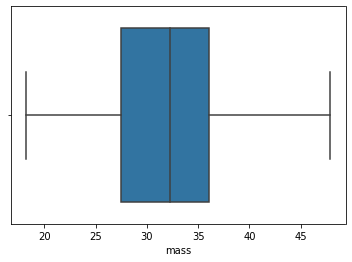

In [31]:
sns.boxplot(x=ds['mass'])

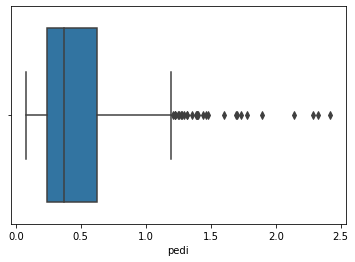

In [32]:
sns.boxplot(x=ds['pedi'])

In [33]:
median_target('pedi')

,class,pedi
0,0,0.336
1,1,0.449


In [34]:
ds.loc[(ds['class'] == 0 ) & (ds['pedi']>1), 'pedi'] = 0.336
ds.loc[(ds['class'] == 1 ) & (ds['pedi']>1), 'pedi'] = 0.449

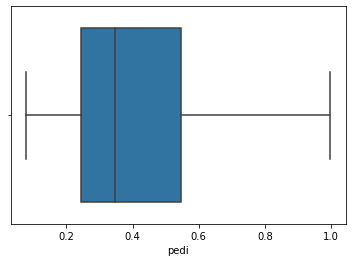

In [35]:
sns.boxplot(x=ds['pedi'])

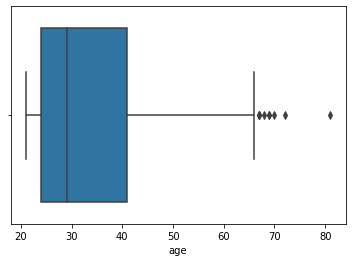

In [36]:
sns.boxplot(x=ds['age'])

In [37]:
median_target('age')

,class,age
0,0,27
1,1,36


In [38]:
ds

,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,0.449,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,26.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [39]:
x=ds.iloc[:,0:8].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [40]:
y=ds.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

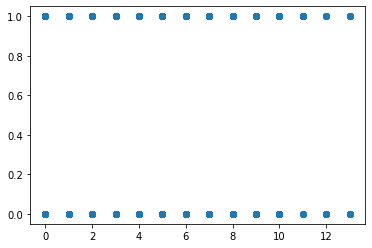

In [41]:
plt.scatter(x[:,0],y)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.67692751,  0.86604475, -0.00472509, ...,  0.24092116,
         1.015903  ,  1.4259954 ],
       [-0.85303226, -1.20506583, -0.56301241, ..., -0.88255837,
        -0.26647172, -0.19067191],
       [ 1.28891142,  2.01666174, -0.74910818, ..., -1.41219872,
         1.22498584, -0.10558415],
       ...,
       [ 0.37093556, -0.02157407, -0.00472509, ..., -0.9467572 ,
        -0.75897795, -0.27575966],
       [-0.85303226,  0.14279979, -1.12129972, ..., -0.32081861,
        -0.27576429,  1.17073215],
       [-0.85303226, -0.94206766, -0.19082086, ..., -0.27266948,
        -0.43373799, -0.87137393]])

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators = 200,criterion='gini',random_state=0)

In [45]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [46]:
y_pred = rf.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [47]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
ac

0.8441558441558441

In [49]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)

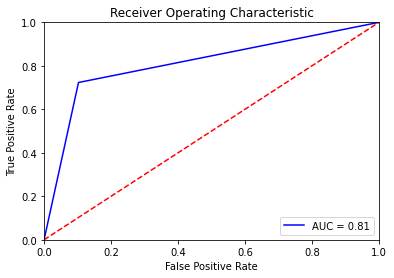

In [50]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()